## Personalized Mentor Recommendation System Project:
We will have a work flow of the model , implement it on step-by-step measures.

## Importing the Important Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity


## Data Collection (Mock Data):
We created a sample aspirant profile and a mock dataset of mentors.
Each mentor and aspirant has attributes like:
1. preferred_subjects
2. target_colleges
3. prep_level
4. learning_style

In [6]:
# Aspirant Profile (Input)
aspirant = {
    'preferred_subjects': ['Constitutional Law', 'Legal Reasoning'],
    'target_colleges': ['NLSIU', 'NLU Delhi'],
    'prep_level': 'Intermediate',
    'learning_style': 'Visual'
}

In [8]:
# Mock Mentors Dataset
data = [
    {'mentor': 'Mentor A', 'preferred_subjects': ['Constitutional Law'], 'target_colleges': ['NLSIU'], 'prep_level': 'Advanced', 'learning_style': 'Visual'},
    {'mentor': 'Mentor B', 'preferred_subjects': ['Legal Reasoning', 'English'], 'target_colleges': ['NLU Delhi'], 'prep_level': 'Intermediate', 'learning_style': 'Auditory'},
    {'mentor': 'Mentor C', 'preferred_subjects': ['Logical Reasoning'], 'target_colleges': ['NLU Jodhpur'], 'prep_level': 'Beginner', 'learning_style': 'Kinesthetic'},
    {'mentor': 'Mentor D', 'preferred_subjects': ['Constitutional Law', 'Legal Reasoning'], 'target_colleges': ['NLSIU', 'NLU Delhi'], 'prep_level': 'Intermediate', 'learning_style': 'Visual'},
]



In [10]:
mentors_df = pd.DataFrame(data)

## Feature Processing
Combine all the unique Categorical fields

In [12]:
all_data = mentors_df.copy()
all_data.loc[-1] = aspirant
all_data.index = all_data.index + 1
all_data = all_data.sort_index()

In [ ]:
Encode Multi-Label Fields

In [14]:
mlb = MultiLabelBinarizer()
subjects_encoded = mlb.fit_transform(all_data['preferred_subjects'])
colleges_encoded = mlb.fit_transform(all_data['target_colleges'])


In [ ]:
Encode Single-Label Categorical

In [16]:
prep_level_map = {'Beginner': 0, 'Intermediate': 1, 'Advanced': 2}
learning_style_map = {'Visual': 0, 'Auditory': 1, 'Kinesthetic': 2}
prep_encoded = all_data['prep_level'].map(prep_level_map)
learn_encoded = all_data['learning_style'].map(learning_style_map)

In [ ]:
Final Feature Matrix

In [18]:
import numpy as np
features = np.hstack((subjects_encoded, colleges_encoded, 
                      prep_encoded.values.reshape(-1, 1), 
                      learn_encoded.values.reshape(-1, 1)))

## Cosine Similarity

In [20]:
aspirant_vector = features[0].reshape(1, -1)
mentor_vectors = features[1:]

In [22]:
similarities = cosine_similarity(aspirant_vector, mentor_vectors)[0]
mentors_df['similarity'] = similarities


## Recommend Top 3 Mentors

In [24]:
top_mentors = mentors_df.sort_values(by='similarity', ascending=False).head(3)
print("Top 3 Mentor Recommendations:")
print(top_mentors[['mentor', 'similarity']])

Top 3 Mentor Recommendations:
     mentor  similarity
3  Mentor D    1.000000
0  Mentor A    0.730297
1  Mentor B    0.600000


## Graphical Representation 

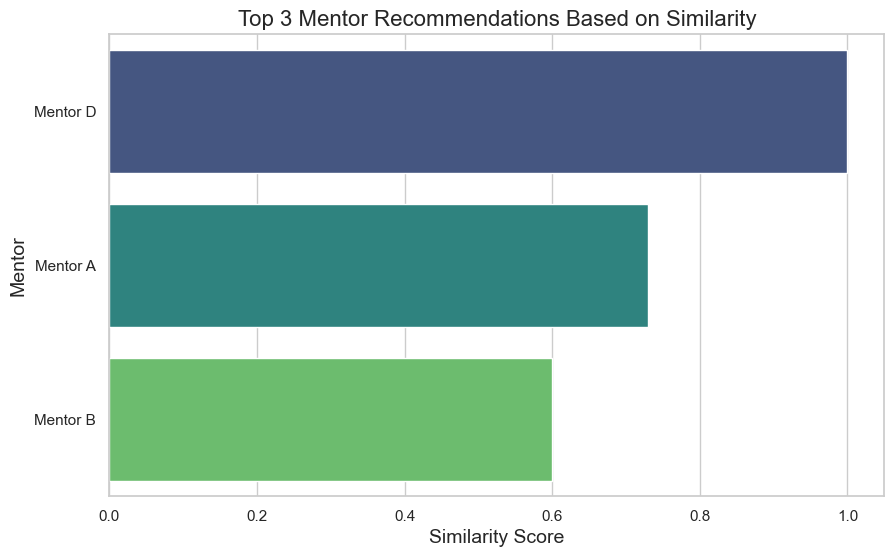

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot of top 3 mentors by similarity score
plt.figure(figsize=(10, 6))
sns.barplot(x='similarity', y='mentor', data=top_mentors, palette='viridis')

# Set plot labels and title
plt.title('Top 3 Mentor Recommendations Based on Similarity', fontsize=16)
plt.xlabel('Similarity Score', fontsize=14)
plt.ylabel('Mentor', fontsize=14)

# Display the plot
plt.show()

## Conclusion :
This project successfully demonstrates a simple yet effective AI/ML-based recommendation system that matches law aspirants with suitable mentors based on profile similarity. By encoding user preferences and applying cosine similarity, the system provides personalized top-3 mentor recommendations.

This approach can enhance mentorship engagement for CLAT and other law entrance exam aspirants and can be further improved over time with real user feedback and behavioral data.